In [275]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import randint, uniform
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import (
    recall_score,
    make_scorer,
    classification_report,
    accuracy_score,
    precision_score,
    f1_score,
    confusion_matrix,
    precision_recall_curve,
    ConfusionMatrixDisplay,
)

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import shap


import warnings


warnings.filterwarnings("ignore")

### Read The Dataset

---


In [207]:
# Reading the data
df = pd.read_csv("project_data.csv")

### Simple EDA

---


In [208]:
df.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,NaN,1.0,1,Returning_Visitor,False,False
1,1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2.0,NaN,2,Returning_Visitor,False,False
2,2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1.0,NaN,3,Returning_Visitor,False,False
3,3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2.0,2.0,4,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3.0,1.0,4,Returning_Visitor,True,False


Clean up df from duplicate columns unamed used as index


In [209]:
# Removing a duplicate index column
df = df.drop(columns="Unnamed: 0")

Checking if there exist any NaN' values


In [210]:
# Checking For NaN's And Datatypes For Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12207 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12146 non-null  float64
 13  Region                   12084 non-null  float64
 14  TrafficType           

In [211]:
# Checking NaN's per column
df.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                   0
SpecialDay                 123
Month                        0
OperatingSystems             0
Browser                    184
Region                     246
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                    147
dtype: int64

In [212]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,NaN,1.0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2.0,NaN,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1.0,NaN,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2.0,2.0,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3.0,1.0,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6.0,NaN,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2.0,1.0,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2.0,1.0,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2.0,3.0,11,Returning_Visitor,False,False


In [213]:
# Checking Regular Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.238200,3.409269,-10.00000,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,1269.776004,34071.466930,0.00000,0.000000,8.000000,93.787500,989493.000000
Informational,12330.0,0.503569,1.270156,0.00000,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.00000,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.00000,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.00000,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.044239,0.239735,-0.49868,0.000000,0.002896,0.018029,2.098952
ExitRates,12330.0,0.043073,0.048597,0.00000,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.00000,0.000000,0.000000,0.000000,361.763742
SpecialDay,12207.0,0.061260,0.198650,0.00000,0.000000,0.000000,0.000000,1.000000


Thoughts that has been noticed:

- SpecialDay, Browser,Region: What we can do is for the most of them to fill up it's missing value to either most frequent used or a default placeholder
- Revenue: Since it also has some NaN values we could opt remove drop column or impute some value

Negative valeus that should not exist:

- BounceRates:
- Adminastrive

Extreme values:

- ProductRelated_Duration:
- Administrative_Duration:


In [214]:
# Removing Any Rows Where Our Target Column Has A NAN
df.dropna(subset=["Revenue"], inplace=True)

In [215]:
# Changing The Revenue Column To Have 1 For True And 0 For False
df["Revenue"] = df["Revenue"].replace({True: 1, False: 0})

In [216]:
# Saving Names Of All Columns That Are Of Data Type Object
categorical_cols = df.select_dtypes("object").columns.tolist()

In [217]:
categorical_cols

['Month', 'VisitorType', 'Weekend']

In [218]:
# Changing Values From Weekend Column Which Didnt Belong There To NaN So That I Can Impute Them Later Or Drop The Column All Together
df["Weekend"] = df["Weekend"].replace(
    {"Name:Zara": np.nan, "True": 1, "False": 0})

In [219]:
visitor_remap = {'Returning_Visitor': 0,
                 'New_Visitor': 1,
                 'Other': 2}

df['VisitorType'] = df['VisitorType'].replace(visitor_remap)

I have concluded that both "Sept" and "Sep" is the same and that "Turc" is supposed to be April.
Also that janury does not exist


In [220]:
month_mapping = {
    'Feb': 2, 'Mar': 3, 'Turc': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Replace the month abbreviations in the 'Month' column with their numerical values
df['Month'] = df['Month'].replace(month_mapping)

BalanceRates cannot have over 1


In [221]:
# Checking The Rows Where BounceRates Are More Than 1, We cant Have A Higher BounceRate Than 100%.
df.query("BounceRates > 1")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10,0,0.000000,0,0.00,3,395.000000,1.767990,0.066667,0.000000,0.0,2,1,1.0,3.0,3,0,0.0,0
55,0,0.000000,0,0.00,1,0.000000,1.250573,0.200000,0.000000,0.2,2,2,4.0,1.0,3,0,0.0,0
56,0,0.000000,0,0.00,1,0.000000,2.057441,0.200000,0.000000,0.6,2,3,2.0,3.0,3,0,0.0,0
136,0,0.000000,0,0.00,9,303.666667,1.274479,0.046296,0.000000,0.0,2,2,4.0,5.0,2,0,0.0,0
159,0,0.000000,0,0.00,1,0.000000,1.298691,0.200000,0.000000,0.0,2,3,2.0,3.0,3,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12101,1,21.250000,1,0.00,23,1171.071429,1.203863,0.039506,11.077032,0.0,12,2,2.0,7.0,1,0,0.0,0
12128,6,77.750000,0,0.00,18,941.916667,1.826557,0.001429,0.000000,0.0,11,2,2.0,1.0,2,1,0.0,0
12200,0,0.000000,0,0.00,1,0.000000,1.867932,0.200000,0.000000,0.0,12,2,2.0,6.0,1,0,1.0,0
12214,0,0.000000,0,0.00,69,2077.806007,1.271865,0.018562,0.000000,0.0,11,2,2.0,4.0,2,0,0.0,0


In [222]:
df['BounceRates'] = df['BounceRates'].abs()

In [223]:
# Dividing The Above Rows With 100 To Change Them Into Decimal Form
df.loc[df["BounceRates"] > 1, "BounceRates"] = df["BounceRates"] / 100

**_In the 'Administrative' column, a value of 0 should logically correspond to an 'Administrative_Duration' of 0 as well. If 'Administrative' is 0, but 'Administrative_Duration' is greater than 0, this indicates a data anomaly or error. To correct this, we will set 'Administrative_Duration' to 0 wherever 'Administrative' is 0, ensuring the data remains consistent and accurate._**


In [224]:
df.query("Administrative == 0 and Administrative_Duration > 0")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6434,0,971707.0,0,0.0,9,249.410000,0.022222,0.005128,0.0,0.0,11,1,2.0,1.0,4,0,0.0,0
8641,0,965480.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,12,3,2.0,7.0,1,0,0.0,0
8979,0,984643.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,11,1,1.0,1.0,1,2,0.0,0
9375,0,985147.0,0,0.0,42,2239.363889,0.020000,0.035455,0.0,0.0,12,3,2.0,7.0,2,0,0.0,0
9948,0,973917.0,0,0.0,3,0.000000,0.200000,0.200000,0.0,0.0,11,2,7.0,2.0,1,0,0.0,0


In [225]:
# Changing The Values Here To 0 Since if A Session Didnt Visit An Administrative Page Couldnt Have A Duration For Those Pages
df.loc[df["Administrative"] == 0, "Administrative_Duration"] = 0

In [226]:
# Checking If We Had A Duration Of Product Related Pages That Were 0 But The Duration For The Same Pages Were Higher Than 0
df.query("ProductRelated == 0 and ProductRelated_Duration > 0")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


**_Showing that thoose extreme values on the duration on adminastrive is not so much rows, we opt to drop them rows._**


In [227]:
# Saving Numerical Columns Names
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# After Reading The Docs, We Should'nt Have Any Negative Numbers So I Change The Ones We had To Positive Since They Were In Normal Range For Their Columns
df[numeric_cols] = df[numeric_cols].abs()

In [228]:
px.scatter(df, df["Administrative_Duration"])

In [229]:
df.query("Administrative_Duration > 3500").reset_index()

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,2560,9,989493.0,4,154.0,154,8038.325302,0.007333,0.027963,0.0,0.0,5,2,2.0,1.0,5,0,0.0,0
1,3757,2,987522.0,1,201.0,14,1033.066667,0.012500,0.012292,0.0,0.0,5,1,1.0,6.0,3,0,1.0,0
2,6160,3,980612.0,0,0.0,24,755.000000,0.000000,0.007407,0.0,0.0,10,2,5.0,7.0,2,1,1.0,0
3,7109,2,968066.0,0,0.0,45,580.935714,0.004444,0.005000,0.0,0.0,8,2,2.0,1.0,2,1,0.0,0
4,7260,2,985308.0,0,0.0,25,1684.375000,0.014815,0.052675,0.0,0.0,7,1,1.0,8.0,3,0,1.0,0
5,7459,4,971509.0,0,0.0,5,61.400000,0.000000,0.014286,0.0,0.0,10,2,2.0,4.0,4,1,0.0,0
6,7789,8,977747.0,0,0.0,13,288.713333,0.000000,0.003589,0.0,0.0,9,3,2.0,4.0,3,1,0.0,0
7,9642,5,984508.0,0,0.0,6,135.083333,0.000000,0.009091,0.0,0.0,11,1,1.0,2.0,2,1,1.0,0
8,10955,4,965596.0,0,0.0,6,415.500000,0.000000,0.012500,0.0,0.0,12,1,1.0,3.0,8,1,0.0,0
9,11172,2,970294.0,2,189.0,134,6732.124414,0.008019,0.025030,0.0,NaN,11,1,8.0,3.0,11,0,0.0,0


In [230]:
# Identifying The Outliers From Administrative_Duration Since Theese Rows Had Values Reaching Close To 1 Million While The Rest Had Values < 3500!
rows_to_drop = df.query("Administrative_Duration > 3500").index



df = df.drop(index=rows_to_drop)

In [231]:
# Changing Values In Special Day To Numerical.
df["SpecialDay"] = df["SpecialDay"].replace({"True": 1, "False": 0})

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12173.0,2.349298,3.334988,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12173.0,80.714721,176.780366,0.0,0.000000,7.000000,93.000000,3398.750000
Informational,12173.0,0.503081,1.267504,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12173.0,34.420989,140.914888,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12173.0,31.701881,44.456366,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12173.0,1193.415480,1914.927849,0.0,184.100000,598.500000,1462.659125,63973.522230
BounceRates,12173.0,0.030286,0.069991,0.0,0.000000,0.004167,0.019355,0.498680
ExitRates,12173.0,0.043158,0.048696,0.0,0.014286,0.025185,0.050000,0.200000
PageValues,12173.0,5.881998,18.528410,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12052.0,0.061517,0.199083,0.0,0.000000,0.000000,0.000000,1.000000


In [233]:
fig = px.histogram(
    df,
    x="Month",
    title=f"Distribution of Months",
    color="Month",
)
fig.update_layout(bargap=0.1)
fig.show()

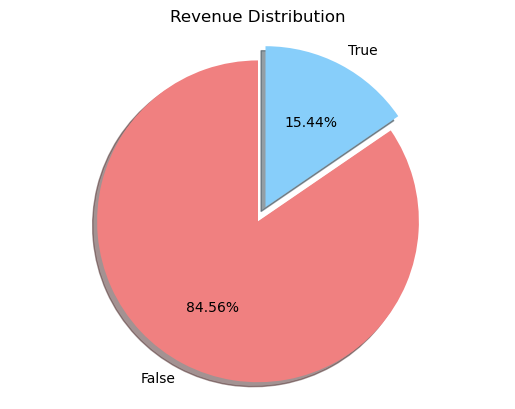

In [234]:
revenue_df = df["Revenue"].value_counts().reset_index()
revenue_df.columns = ["Revenue", "Count"]
revenue_df["Revenue"] = revenue_df["Revenue"].replace({0: False, 1: True})


sizes = revenue_df["Count"].values


labels = ["False", "True"]

labels = labels
sizes = sizes
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.2f%%",
    shadow=True,
    startangle=90,
)
ax1.axis("equal")

plt.title("Revenue Distribution")
plt.show()

In [235]:
special_day_revenue_df = (
    df.groupby("SpecialDay")["Revenue"]
    .value_counts(normalize=True)
    .unstack()
    .reset_index()
)
special_day_revenue_df.columns = [

    "SpecialDay", "Revenue_False", "Revenue_True"]
special_day_revenue_df.sort_values(by="Revenue_True", ascending=True).reset_index(
    drop=True
)

,SpecialDay,Revenue_False,Revenue_True
0,0.8,0.965732,0.034268
1,0.4,0.949580,0.050420
2,1.0,0.933333,0.066667
3,0.2,0.925287,0.074713
4,0.6,0.917889,0.082111
5,0.0,0.835150,0.164850


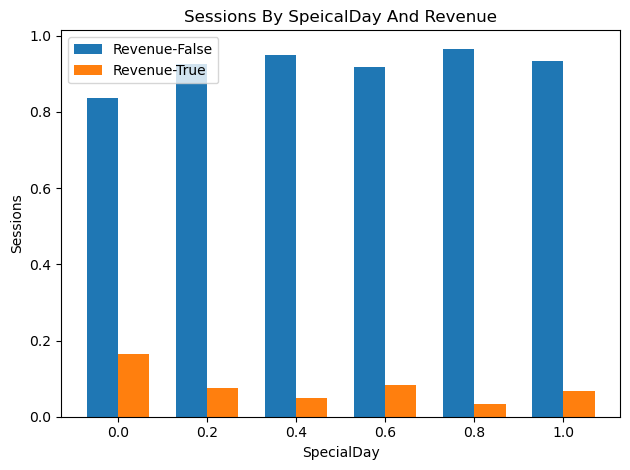

In [236]:
special_day = special_day_revenue_df["SpecialDay"]
revenue_false = special_day_revenue_df["Revenue_False"]
revenue_true = special_day_revenue_df["Revenue_True"]

x = np.arange(len(special_day))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, revenue_false, width, label="Revenue-False")
rects2 = ax.bar(x + width / 2, revenue_true, width, label="Revenue-True")


ax.set_ylabel("Sessions")
ax.set_xlabel("SpecialDay")
ax.set_title("Sessions By SpeicalDay And Revenue")
ax.set_xticks(x)
ax.set_xticklabels(special_day)
ax.legend()

fig.tight_layout()

plt.show()

In [237]:
monthly_revenue = (
    df.groupby("Month")["Revenue"].value_counts(
        normalize=True).unstack().reset_index()
)
monthly_revenue.columns = ["Month", "Revenue_False", "Revenue_True"]
monthly_revenue.sort_values(
    by="Revenue_True", ascending=False).reset_index(drop=True)

,Month,Revenue_False,Revenue_True
0,11,0.746622,0.253378
1,10,0.790055,0.209945
2,9,0.806378,0.193622
3,8,0.826291,0.173709
4,7,0.849412,0.150588
5,12,0.875220,0.124780
6,4,0.886905,0.113095
7,5,0.891532,0.108468
8,3,0.900318,0.099682
9,6,0.901754,0.098246


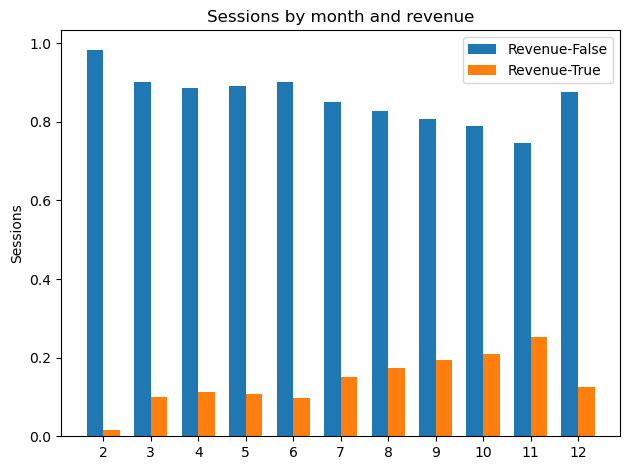

In [238]:
months = monthly_revenue["Month"]
revenue_false = monthly_revenue["Revenue_False"]
revenue_true = monthly_revenue["Revenue_True"]

x = np.arange(len(months))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, revenue_false, width, label="Revenue-False")
rects2 = ax.bar(x + width / 2, revenue_true, width, label="Revenue-True")


ax.set_ylabel("Sessions")
ax.set_title("Sessions by month and revenue")
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

fig.tight_layout()

plt.show()

In [239]:
Browser_revenue = (
    df.groupby("Browser")["Revenue"]
    .value_counts(normalize=False)
    .unstack()
    .reset_index()
)
Browser_revenue.columns = ["Browser", "Revenue_False", "Revenue_True"]
Browser_revenue.sort_values(

    by="Revenue_True", ascending=False).reset_index(drop=True)

,Browser,Revenue_False,Revenue_True
0,2.0,6558.0,1188.0
1,1.0,2035.0,354.0
2,4.0,585.0,127.0
3,5.0,372.0,85.0
4,10.0,129.0,28.0
5,6.0,150.0,20.0
6,8.0,112.0,20.0
7,13.0,45.0,16.0
8,7.0,43.0,6.0
9,3.0,96.0,5.0


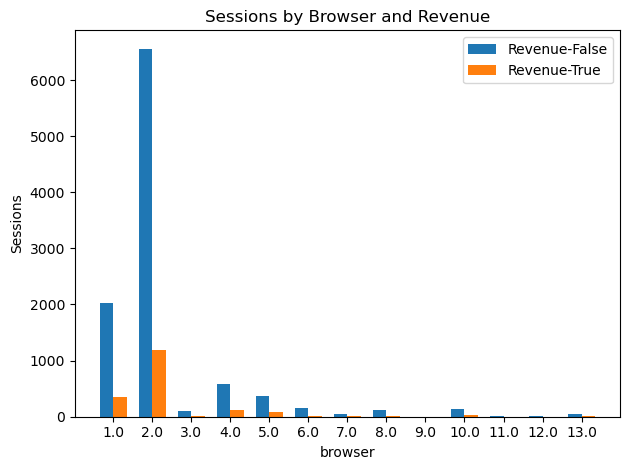

In [240]:
browser = Browser_revenue["Browser"]
revenue_false = Browser_revenue["Revenue_False"]
revenue_true = Browser_revenue["Revenue_True"]

x = np.arange(len(browser))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, revenue_false, width, label="Revenue-False")
rects2 = ax.bar(x + width / 2, revenue_true, width, label="Revenue-True")


ax.set_ylabel("Sessions")
ax.set_xlabel("browser")
ax.set_title("Sessions by Browser and Revenue")
ax.set_xticks(x)
ax.set_xticklabels(browser)
ax.legend()

fig.tight_layout()

plt.show()

---

### Feature Engineering

New Features Added:

- **_TotalPages: Sum of all types of pages visited during a session, indicating overall engagement._**
- **_TotalDuration: Combined duration of time spent on different page types, showing total session investment._**
- **_Duration_Per_Page: Average time spent per page (TotalDuration / TotalPages), reflecting user interest level._**
- **_Duration_Per_Product: Average time spent on each product page (ProductRelated_Duration / ProductRelated), suggesting purchase intent._**
- **_Total_Pages: Total number of activities (Administrative, Informational, ProductRelated) during a session, indicating user engagement._**

Interaction Features:

- **_Admin_Product_Interaction: Combines administrative tasks and product-related activities, likely indicating strong purchase intent._**
- **_Informational_Product_Interaction: Mixes informational content engagement with product page duration, pointing to thorough research behavior._**
- **_Admin_Informational_Interaction: Connects administrative tasks with information-seeking behavior, showing user engagement._**
- **_Product_PageValue_Interaction: Links product-related activities with page values, highlighting interest in high-value products._**
- **_Exit_Bounce_Rate_Interaction: Merges exit rates and bounce rates to identify sessions with low purchase intent._**

**_I Think That Theese Might Give Me A Better Insight Into What Actually Matters For Revenue Later On_**


In [241]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,NaN,1.0,1,0,0.0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2.0,NaN,2,0,0.0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1.0,NaN,3,0,0.0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2.0,2.0,4,0,0.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3.0,1.0,4,0,1.0,0


In [242]:
df['Total_Pages'] = df['Administrative'] + \
    df['Informational'] + df['ProductRelated']

In [243]:
df['Total_Duration'] = df['Administrative_Duration'] + \
    df['Informational_Duration'] + df['ProductRelated_Duration']

In [244]:
df["Duration_Per_Page"] = df["Total_Duration"] / df["Total_Pages"]

df["Duration_Per_Product_Page"] = df["ProductRelated_Duration"] / \
    df["ProductRelated"]

In [245]:
df["PageValue_per_ProductRelated"] = (
    (df["PageValues"] / df["Total_Pages"]) * df["ProductRelated"])

In [246]:
df['Admin_Product_Interaction'] = df['Administrative'] * df['ProductRelated']

df['Informational_Product_Interaction'] = df['Informational'] * \
    df['ProductRelated_Duration']

df['Admin_Informational_Interaction'] = df['Administrative'] * \
    df['Informational']

df['Product_PageValue_Interaction'] = df['ProductRelated'] * df['PageValues']

df['Exit_Bounce_Rate_Interaction'] = df['ExitRates'] * df['BounceRates']

In [248]:
# Filling In The Newly Created NaN's With 0's
df["Duration_Per_Product_Page"] = df["Duration_Per_Product_Page"].fillna(0)

df["Duration_Per_Page"] = df["Duration_Per_Page"].fillna(
    0)
df["PageValue_per_ProductRelated"] = df["PageValue_per_ProductRelated"].fillna(
    0)

Updating numecrical cols to new columns


In [249]:
categorical_numerical_cols = [
    "SpecialDay",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "Weekend",
]

In [250]:
categorical_cols

['Month', 'VisitorType', 'Weekend']

In [251]:
categorical_cols = categorical_cols + categorical_numerical_cols

In [252]:
categorical_cols

['Month',
 'VisitorType',
 'Weekend',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend']

In [253]:
categorical_cols.pop()

'Weekend'

---

### Splitting Our Data Into Train/Validation/Test


In [254]:
X, y = df.drop(columns=["Revenue"]), df[["Revenue"]]

---

### Splitting Our Data Into Train/Validation/Test

**_Also Making Sure We Split Before We Make Any Imputation, Encoding Or Anything Else That Might Cause Data Leakage_**


In [255]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
numeric_non_categorical_cols = [
    col for col in numeric_cols if col not in categorical_cols
]
numeric_non_categorical_cols

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'Total_Pages',
 'Total_Duration',
 'Duration_Per_Page',
 'Duration_Per_Product_Page',
 'PageValue_per_ProductRelated',
 'Admin_Product_Interaction',
 'Informational_Product_Interaction',
 'Admin_Informational_Interaction',
 'Product_PageValue_Interaction',
 'Exit_Bounce_Rate_Interaction']

**_Splitting Our Data Into Train/Val/Test, We Add Stratify Parameter To Make Sure That Our Distribution Of The Target Is Equal Among All Sets Since The Data Is Imbalanced._**  
**_We Will Handle The Imbalance In The Training Set With Different Techniques To See What Works Best_**


In [256]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, train_size=0.2, stratify=y, random_state=42
)

In [257]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.3, stratify=y_train_val, random_state=42
)

---

## Prepoccessing pipeline

**_I couldnt Find Any Correlations That Could Help Us Find A Solution That Is Alot Better, So For This Exercise, This Will Have To Do_**


In [259]:
cols_to_impute = [
    "SpecialDay",
    "Browser",
    "Region",
    "Weekend",
]

**_Imputing NaN's With The Most Frequent Value Of Each Column_**


In [260]:
imputer = SimpleImputer(strategy="most_frequent").fit(X_train[cols_to_impute])

In [261]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Total_Pages', 'Total_Duration', 'Duration_Per_Page',
       'Duration_Per_Product_Page', 'PageValue_per_ProductRelated',
       'Admin_Product_Interaction', 'Informational_Product_Interaction',
       'Admin_Informational_Interaction', 'Product_PageValue_Interaction',
       'Exit_Bounce_Rate_Interaction'],
      dtype='object')

In [263]:
X_train[cols_to_impute] = imputer.transform(X_train[cols_to_impute])
X_val[cols_to_impute] = imputer.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])

In [264]:
X_train.isna().sum()

Administrative                       0
Administrative_Duration              0
Informational                        0
Informational_Duration               0
ProductRelated                       0
ProductRelated_Duration              0
BounceRates                          0
ExitRates                            0
PageValues                           0
SpecialDay                           0
Month                                0
OperatingSystems                     0
Browser                              0
Region                               0
TrafficType                          0
VisitorType                          0
Weekend                              0
Total_Pages                          0
Total_Duration                       0
Duration_Per_Page                    0
Duration_Per_Product_Page            0
PageValue_per_ProductRelated         0
Admin_Product_Interaction            0
Informational_Product_Interaction    0
Admin_Informational_Interaction      0
Product_PageValue_Interac

---

# OneHotEncoding Our Categorical Columns for our models


In [265]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Total_Pages', 'Total_Duration', 'Duration_Per_Page',
       'Duration_Per_Product_Page', 'PageValue_per_ProductRelated',
       'Admin_Product_Interaction', 'Informational_Product_Interaction',
       'Admin_Informational_Interaction', 'Product_PageValue_Interaction',
       'Exit_Bounce_Rate_Interaction'],
      dtype='object')

In [267]:
categorical_cols

['Month',
 'VisitorType',
 'Weekend',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [268]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore").fit(
    X_train[categorical_cols]
)
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [269]:
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])

<!--  -->


---

### Scaling Our Numerical (Non-Categorical) Columns

**_We will use a MinMaxScaler to scale our numerical features. MinMaxScaler scales the data to a specified range, typically [0, 1], ensuring that all features contribute equally to the model without being influenced by different scales. While MinMaxScaler can be sensitive to outliers, it effectively prevents the generation of negative values, which is crucial for certain models and interpretation methods._**


In [276]:
scaler = MinMaxScaler().fit(X_train[numeric_non_categorical_cols])

In [277]:
X_train[numeric_non_categorical_cols] = scaler.transform(
    X_train[numeric_non_categorical_cols]
)
X_val[numeric_non_categorical_cols] = scaler.transform(
    X_val[numeric_non_categorical_cols]
)
X_test[numeric_non_categorical_cols] = scaler.transform(
    X_test[numeric_non_categorical_cols]
)

---

### Saving Our Changes To The Df Without The Columns That We Encoded


In [279]:
X_train = X_train[numeric_non_categorical_cols + encoded_cols]
X_val = X_val[numeric_non_categorical_cols + encoded_cols]
X_test = X_test[numeric_non_categorical_cols + encoded_cols]

---


### Creating Our First Models

- LinearRegressor
- DecisionTree
- RandomForest
- SVM
- KNN
- AdaBoost

---


In [281]:
def evaluate_model_performance(
    X, y, models, scoring, cv_strategy=StratifiedKFold(n_splits=5)
):
    """
    Parameters:
    - X: Features dataset
    - y: Target dataset
    - models: Dictionary of model names and their corresponding initialized objects
    - scoring: Dictionary of scoring metrics
    - cv_strategy: Cross-validation splitting strategy

    Returns:
    A dictionary containing cross-validated performance metrics for each model.
    """
    model_performance = {}
    for name, model in models.items():
        cv_results = cross_validate(
            model, X, y, cv=cv_strategy, scoring=scoring, n_jobs=-1
        )

        # Store the mean of the scores from the cross-validation
        model_performance[name] = {
            "Accuracy": np.mean(cv_results["test_accuracy"]),
            "Precision": np.mean(cv_results["test_precision"]),
            "Recall": np.mean(cv_results["test_recall"]),
            "F1 Score": np.mean(cv_results["test_f1_score"]),
        }

    return model_performance

In [282]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

In [283]:
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0, pos_label=1),
    "recall": make_scorer(recall_score, zero_division=0, pos_label=1),
    "f1_score": make_scorer(f1_score, zero_division=0, pos_label=1),
}

In [284]:
model_performance_ootb = evaluate_model_performance(
    X_train.values, y_train, models, scoring
)

# Display the performance
for model, performance in model_performance_ootb.items():
    print(f"{model}:")
    for metric, value in performance.items():
        print(f"  {metric}: {value:.4f}")
    print()

Logistic Regression:
  Accuracy: 0.8708
  Precision: 0.7705
  Recall: 0.2318
  F1 Score: 0.3560

Decision Tree:
  Accuracy: 0.8573
  Precision: 0.5386
  Recall: 0.5550
  F1 Score: 0.5457

Random Forest:
  Accuracy: 0.9025
  Precision: 0.7384
  Recall: 0.5707
  F1 Score: 0.6423

SVC:
  Accuracy: 0.8509
  Precision: 0.6333
  Recall: 0.0417
  F1 Score: 0.0771

KNN:
  Accuracy: 0.8415
  Precision: 0.3813
  Recall: 0.0684
  F1 Score: 0.1155

AdaBoost:
  Accuracy: 0.8955
  Precision: 0.6899
  Recall: 0.5852
  F1 Score: 0.6331



### Initial Observations on Model Performance

In our initial evaluation of different machine learning models, we observed that all models exhibit high accuracy, with values ranging from 85% to 90%. However, this high accuracy can be misleading due to the imbalanced nature of our dataset, where one class is more frequent than the other.

**Key Observations:**

- **High Accuracy**: All models show high accuracy, but this metric does not provide a full picture, because it is heavily influenced by the majority class.
- **Varying Precision and Recall**: The models show significant variation in precision and recall:
  - **Logistic Regression**: Shows decent precision but very low recall, indicating it identifies true positives fairly well but misses many instances of the minority class.
  - **Decision Tree**: Provides a somewhat balanced precision and recall, but there is still room for improvement in capturing the minority class.
  - **KNN**: Struggles with very low recall, indicating difficulty in identifying instances of the minority class.
  - **Random Forest**: Achieves the best balance with a higher F1 score, suggesting it manages the trade-off between precision and recall more effectively.
  - **SVC**: Has the lowest recall, showing that it struggles to correctly identify instances of the minority class.

**Why This Matters:**

- **Imbalanced Data Challenge**: When dealing with imbalanced data, models can achieve high accuracy by simply predicting the majority class more often. However, this does not mean the model is effective at identifying the minority class, which is often the class of interest.

**Looking More into Minority Handling:**

We will now add "class_weight" for handling the minorities more effectively.


In [285]:
cw_models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "SVC": SVC(class_weight="balanced", random_state=42),
}

In [286]:
class_weight_model_performance = evaluate_model_performance(
    X_train, y_train, cw_models, scoring
)

# Display the performance
for model, performance in class_weight_model_performance.items():
    print(f"{model}:")
    for metric, value in performance.items():
        print(f"  {metric}: {value:.4f}")
    print()

Logistic Regression:
  Accuracy: 0.7951
  Precision: 0.4094
  Recall: 0.7377
  F1 Score: 0.5262

Decision Tree:
  Accuracy: 0.8696
  Precision: 0.5845
  Recall: 0.5818
  F1 Score: 0.5797

Random Forest:
  Accuracy: 0.9008
  Precision: 0.7333
  Recall: 0.5626
  F1 Score: 0.6361

SVC:
  Accuracy: 0.7487
  Precision: 0.3405
  Recall: 0.6690
  F1 Score: 0.4508



**Logistic Regression:**

- **Before**: High accuracy (87.08%) and precision (77.05%) but lower recall (23.18%).
- **After**: Accuracy decreased to 79.51%, but recall significantly improved to 73.77%, resulting in a better F1 score (52.62%).
- **Conclusion**: The model is now better at identifying the minority class, trading off some accuracy for higher recall and a more balanced F1 score.

**Decision Tree:**

- **Before**: Balanced precision and recall (53.86% precision, 55.50% recall), with a moderate F1 score.
- **After**: Accuracy increased slightly to 86.96%, with an improvement in precision (58.45%) and recall (58.18%), leading to a consistent F1 score (57.97%).
- **Conclusion**: The class weight adjustment has improved the model slightly, indicating better handling of class imbalance without sacrificing overall performance.

**Random Forest:**

- **Before**: High accuracy (90.25%) with a good balance between precision (73.84%) and recall (57.07%).
- **After**: Accuracy slightly decreased to 90.08%, with a minor decrease in recall (56.26%) but consistent precision (73.33%), leading to a stable F1 score (63.61%).
- **Conclusion**: The model's performance remains robust, with minimal impact from the class weight adjustment. It continues to balance precision and recall effectively.

**SVC:**

- **Before**: Low recall (4.17%) with higher precision (63.33%), indicating poor performance on the minority class.
- **After**: Significant improvement in recall (66.90%), but with a drop in precision (34.05%), leading to a more balanced F1 score (45.08%).
- **Conclusion**: SVC shows considerable improvement with class weights, becoming much better at identifying the minority class, though precision suffered as a result.

### Conclusion

Adding class weights generally led to an increase in recall across most models, particularly in Logistic Regression and SVC, indicating that these models are now better at identifying the minority class. However, this improvement in recall came at the cost of precision and overall accuracy in some cases.

The decision of whether to use class weights should be based on the specific goals of the project. If identifying the minority class is critical (e.g., in scenarios like fraud detection or medical diagnosis), then the trade-offs made with class weights are worthwhile. For models like Random Forest and Decision Tree, the impact was less pronounced, suggesting they already handled class imbalance relatively well.


---

### Models I Will Be Using:

- **_AdaBoost_**
- **_RandomForest_**
- **_LogisticRegression_**


In [287]:
models_to_use = [
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    LogisticRegression(class_weight="balanced", random_state=42)
]

In [288]:
def search_best_parameters(model, param_grid, X_train, y_train, cv=3, n_iter=100):
    search = RandomizedSearchCV(
        model,
        param_grid,
        n_iter=n_iter,
        cv=cv,
        scoring="f1",
        random_state=42,
        verbose=3,
        n_jobs=-1,
    )
    search.fit(X_train, y_train)

    print(f"Best parameters for {model.__class__.__name__}: {search.best_params_}"
          )
    print(f"Best score for {model.__class__.__name__}: {search.best_score_}")
    return search.best_params_, search.best_score_

In [289]:
param_grids = [
    # "RandomForestClassifier":
    {
        "n_estimators": randint(100, 500),
        "max_depth": randint(3, 15),
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(2, 4),
        "max_features": ["sqrt", "log2"],
    },
    # "AdaBoostClassifier":
    {
        "n_estimators": randint(50, 400),
        "learning_rate": uniform(0.01, 1.0),
    },
    {
        # "LogisticRegression":
        "C": uniform(0.01, 10.0),  # Regularization strength
        "penalty": ["l1", "l2", "elasticnet"],  # Regularization types
        # Solvers that support l1 and elasticnet
        "solver": ["liblinear", "saga"],
        "class_weight": [None, "balanced"],  # To handle class imbalance
    },
]

In [290]:
best_params = {}


best_scores = {}


for model, param_grid in zip(models_to_use, param_grids):

    best_params, best_score = search_best_parameters(
        model, param_grid, X_train, y_train, n_iter=30
    )

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters for RandomForestClassifier: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 437}
Best score for RandomForestClassifier: 0.6543611750413344
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters for AdaBoostClassifier: {'learning_rate': 0.1934347898661638, 'n_estimators': 121}
Best score for AdaBoostClassifier: 0.6274584588784214
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters for LogisticRegression: {'C': 5.152344384136116, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best score for LogisticRegression: 0.609890319085065


In [291]:
adaboost_tuned = AdaBoostClassifier(
    learning_rate=0.1934347898661638,
    n_estimators=121,
    random_state=42,
).fit(X_train, y_train)

In [292]:
adaboost_val_preds = adaboost_tuned.predict(X_val)

In [293]:
print(classification_report(y_val, adaboost_val_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       618
           1       0.74      0.50      0.60       113

    accuracy                           0.90       731
   macro avg       0.83      0.74      0.77       731
weighted avg       0.89      0.90      0.89       731



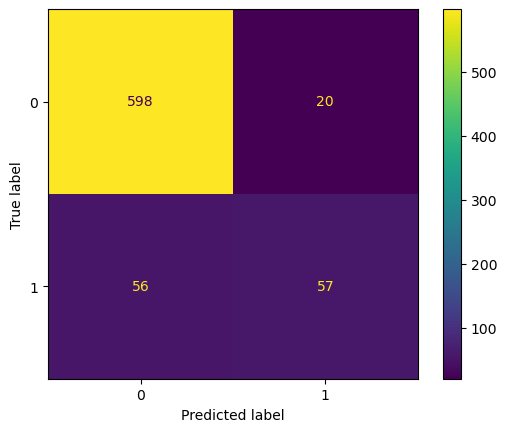

In [294]:
cm = confusion_matrix(y_val, adaboost_val_preds,
                      labels=adaboost_tuned.classes_)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=adaboost_tuned.classes_
)

disp.plot()

plt.show()

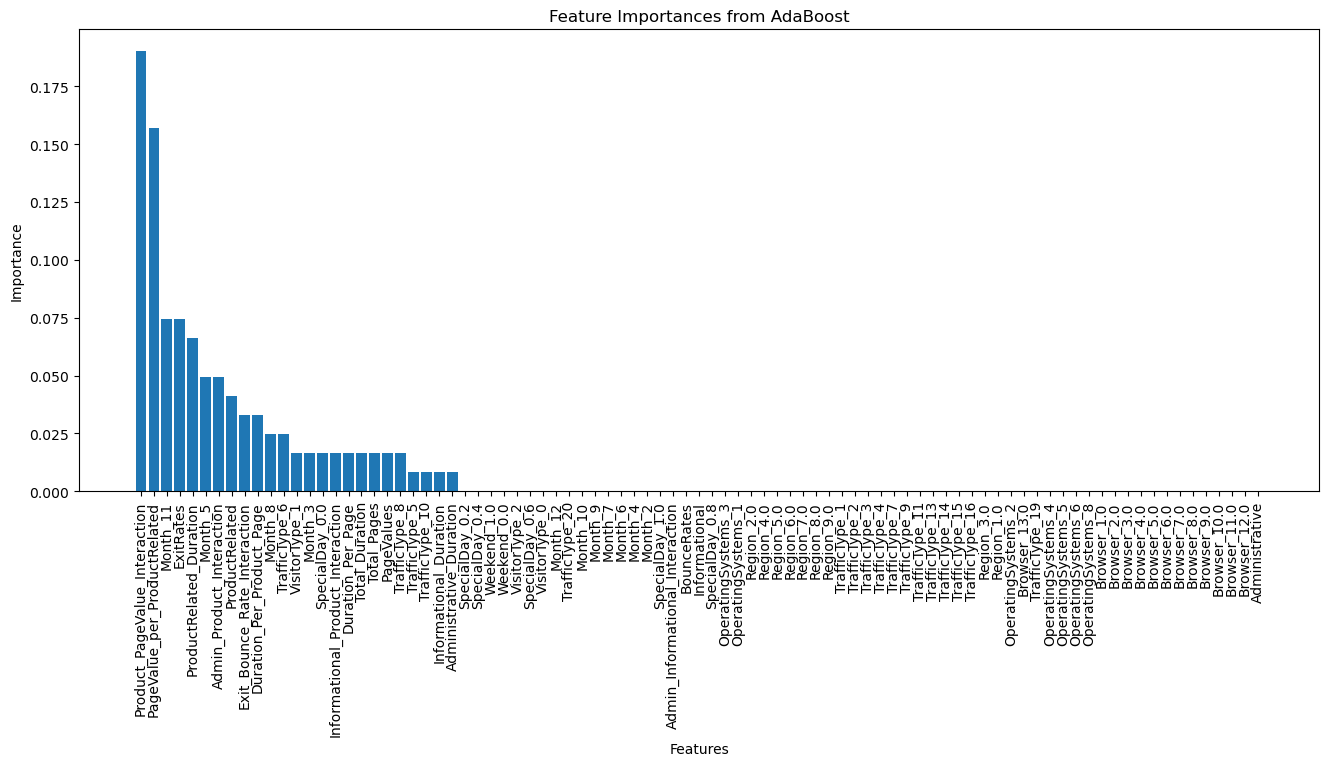

In [295]:
feature_importances = adaboost_tuned.feature_importances_

feature_names = X_train.columns

# Sorting the feature importances with their corresponding feature names
indices = np.argsort(feature_importances)[
    ::-1
]  # Sort the feature indices by importance
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = feature_importances[indices]

# Plotting
plt.figure(figsize=(16, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances from AdaBoost")
plt.show()

Feature Importance Analysis:

The AdaBoost model reveals that "Product_PageValue_Interaction" is overwhelmingly the most important feature, with "ÅageValues_per_ProductRelated" also being significant but to a much lesser degree. This suggests that the model is highly dependent on the interaction between product-related activities and page values to make predictions.

Next Steps:

Given the dominance of a few features in the AdaBoost model, there may be value in exploring the impact of these features more closely. If similar patterns of feature importance are observed across other models, it may be worth considering whether these features should be refined or even dropped to encourage the model to learn from a broader set of behaviors. This could help in creating a more balanced and robust model that captures a wider array of patterns in the data.

---


In [317]:
logisticRegression_tuned = LogisticRegression(
    random_state=42,
    C=5.152344384136116,
    class_weight='balanced',
    penalty='l1',
    solver='liblinear'
).fit(X_train, y_train)

In [318]:
logisticRegression_tuned_preds = logisticRegression_tuned.predict(X_val)

In [319]:
print(classification_report(y_val, logisticRegression_tuned_preds))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       618
           1       0.49      0.71      0.58       113

    accuracy                           0.84       731
   macro avg       0.71      0.79      0.74       731
weighted avg       0.87      0.84      0.85       731



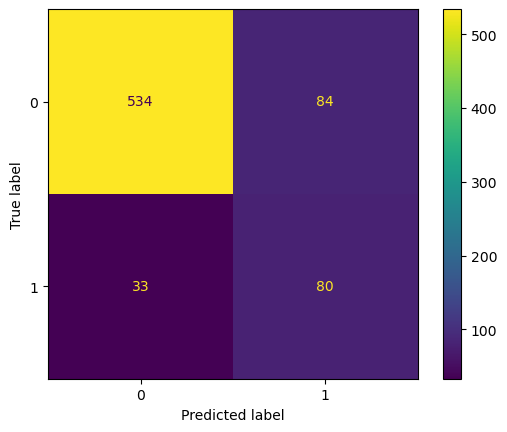

In [320]:
cm = confusion_matrix(
    y_val, logisticRegression_tuned_preds, labels=logisticRegression_tuned.classes_
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=logisticRegression_tuned.classes_
)
disp.plot()
plt.show()

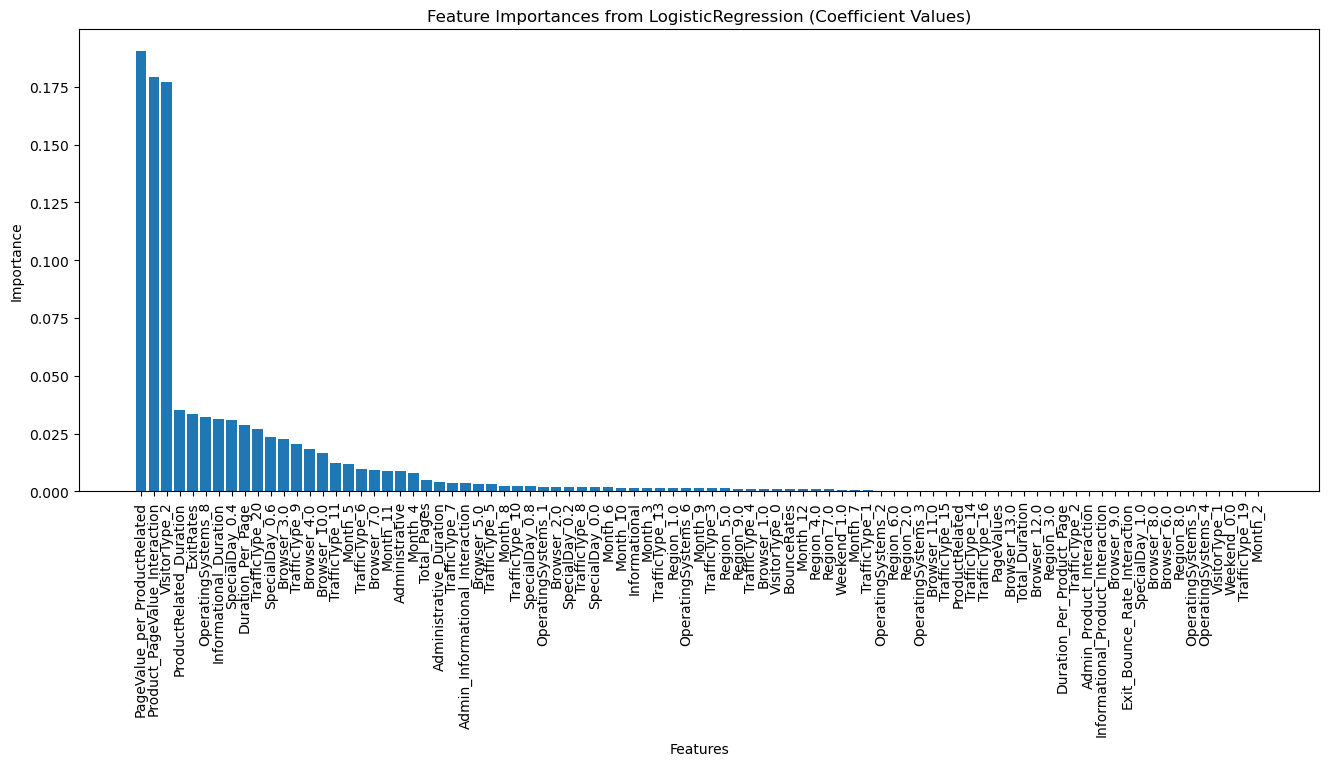

In [321]:
# Get the coefficients from the Logistic Regression model
coefficients = logisticRegression_tuned.coef_[0]

# Get feature names from the DataFrame, assuming `X_train` is a DataFrame
feature_names = X_train.columns

# Sorting the coefficients with their corresponding feature names
# Sort by absolute value of coefficients
indices = np.argsort(np.abs(coefficients))[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_coefficients = coefficients[indices]


# Plotting
plt.figure(figsize=(16, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances from LogisticRegression (Coefficient Values)")
plt.show()

**_In the Logistic Regression model, the feature importance analysis highlights that "PageValue per ProductRelated", "Product_PageValue_Interaction", and "visitorType_2" are among the most influential factors. These features significantly impact the model's predictions, emphasizing the importance of user interactions with product pages and their corresponding value. While other features such as "ExitRates", "Informational_Duration", and "ProductRelated Duration" also contribute to the model's decision-making process, their influence is comparatively lower._**


---


In [303]:
randomforest_tuned = RandomForestClassifier(
    random_state=42,
    max_depth=10,
    max_features="sqrt",
    min_samples_leaf=3,
    min_samples_split=6,
    n_estimators=437,
).fit(X_train, y_train)

In [304]:
randomforest_tuned_preds = randomforest_tuned.predict(X_val)

In [305]:
print(classification_report(y_val, randomforest_tuned_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       618
           1       0.75      0.51      0.61       113

    accuracy                           0.90       731
   macro avg       0.83      0.74      0.78       731
weighted avg       0.89      0.90      0.89       731



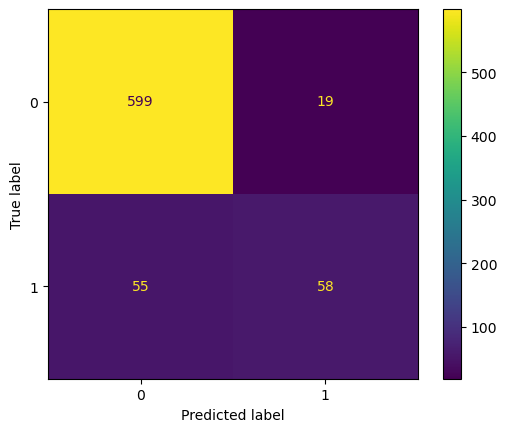

In [306]:
cm = confusion_matrix(
    y_val, randomforest_tuned_preds, labels=randomforest_tuned.classes_
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=randomforest_tuned.classes_
)
disp.plot()
plt.show()

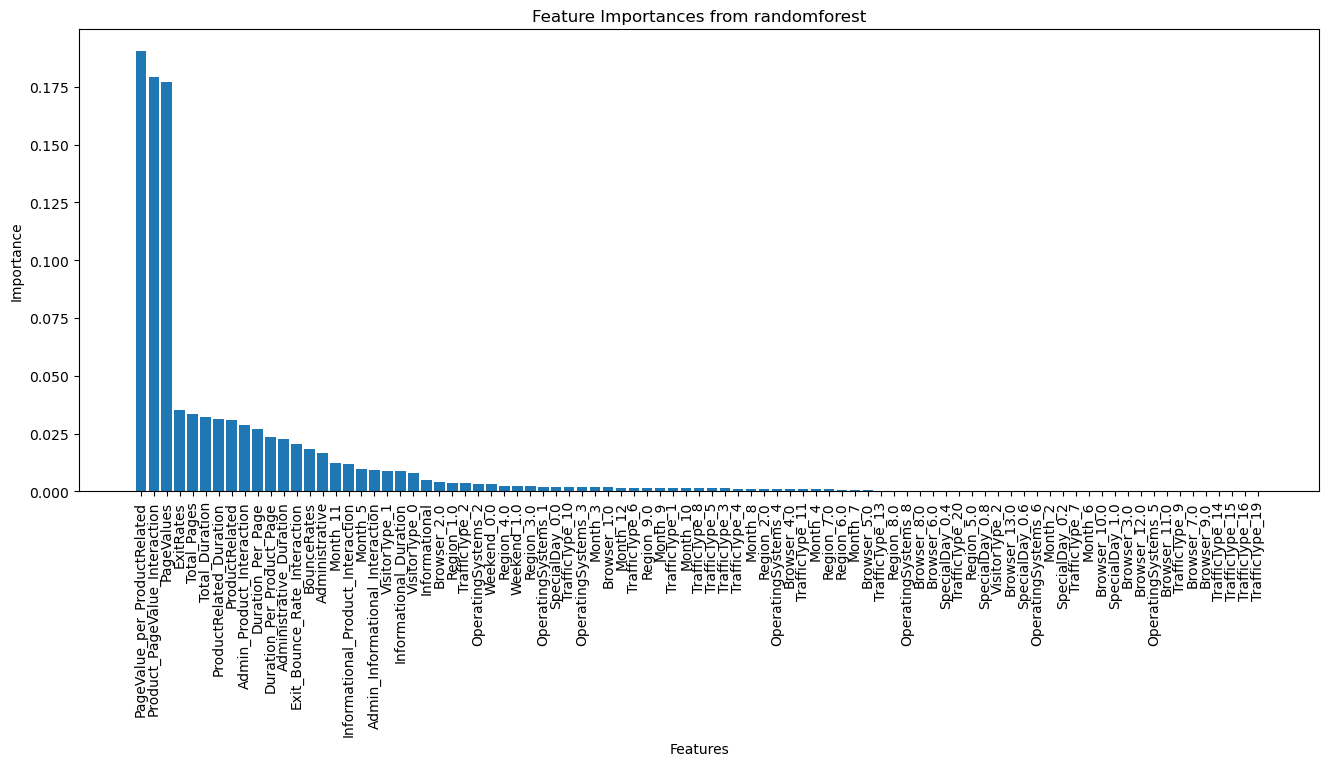

In [307]:

feature_importances = randomforest_tuned.feature_importances_

# Get feature names from the DataFrame, assuming `X_train` is a DataFrame
feature_names = X_train.columns

# Sorting the feature importances with their corresponding feature names
indices = np.argsort(feature_importances)[
    ::-1
]  # Sort the feature indices by importance
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = feature_importances[indices]

# Plotting
plt.figure(figsize=(16, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances from randomforest")
plt.show()

**_Similar to AdaBoost, the Random Forest model also prioritizes Product_PageValue_Interaction and PageValue_per_ProductRelated, but it offers a slightly more balanced view by considering other features like PageValues and ExitRates. This model, being more complex, captures non-linear relationships better but still shows a dependency on the key features observed in the other models._**

**_All three models indicate that a small set of features significantly drive the predictions, particularly those related to product interactions and page values. This recurring pattern suggests that while these features are important, the models might be overly reliant on them, potentially leading to overfitting or a lack of generalization._**


---


In [308]:
feature_selector = RFECV(
    estimator=randomforest_tuned,
    step=1,
    cv=StratifiedKFold(n_splits=5),
    scoring="f1",
    min_features_to_select=1,
    n_jobs=-1,
)

In [309]:
feature_selector.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=3,
                                       min_samples_split=6, n_estimators=437,
                                       random_state=42),
      n_jobs=-1, scoring='f1')

In [310]:
print(f"Optimal number of features: {feature_selector.n_features_}")
print(f"Ranking of features: {feature_selector.ranking_}")

Optimal number of features: 43
Ranking of features: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 29  1 12  1 25
 16  1  3  7  1  1  1  1 24  1  1  1 28 22 30 27 32  1  1  1 11 34 31 19
  1  1 41  4 15 26 43 17 33 35 44 42 23  1  5  1  1 14 13 10 20  1  1  1
  2  1  8  9 36  1 37  1  6 18 39 40 38 45 21]


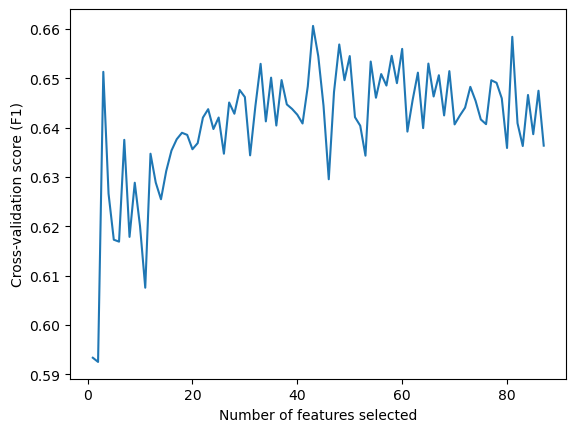

In [311]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (F1)")

# Extract the number of features and the corresponding mean test scores
number_of_features = list(
    range(1, len(feature_selector.cv_results_["mean_test_score"]) + 1)
)
mean_test_scores = feature_selector.cv_results_["mean_test_score"]

plt.plot(number_of_features, mean_test_scores)
plt.show()

**_The plot above shows that the model's performance improves as the number of features increases from 0, with the best performance occurring around 43 features. Beyond this point, the score starts to fluctuate. This suggests that while additional features can initially enhance the model, including too many may introduce noise or reduce effectiveness. Beyond 43 features, the performance becomes more variable, with fluctuations indicating the complex trade-offs involved in adding more features._**


In [312]:
ranking = feature_selector.ranking_
# Get the selected features (True means selected)
selected = feature_selector.support_


# Get the feature names
feature_names = list(X_train.columns)

# Map the rankings and selected features to the feature names
ranked_features = sorted(

    zip(feature_names, ranking, selected), key=lambda x: x[1])

# Now selecting the 43 selected features from
list
top_43_features = [feature for feature, rank,
                   is_selected in ranked_features[:43]]

In [313]:
# Saving A Train Set With Our Selected Features Only
X_train_reduced = X_train[top_43_features]

In [315]:
# Doing THe Same For Our Validation Set
X_val_reduced = X_val[top_43_features]

---

**_Hyperparameter Tuning On The Reduced Dataset And Then Training The Models With The New parameters._**


Having iteration to 50 gives us a better randomforest model, where it find combinations it did not find in the earlier iterations


In [316]:
best_params = {}


best_scores = {}


for model, param_grid in zip(models_to_use, param_grids):

    best_params, best_score = search_best_parameters(
        model, param_grid, X_train_reduced, y_train, n_iter=50
    )
    print()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for RandomForestClassifier: {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 215}
Best score for RandomForestClassifier: 0.664711434533877

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for AdaBoostClassifier: {'learning_rate': 0.08455064367977082, 'n_estimators': 376}
Best score for AdaBoostClassifier: 0.6401227464518603

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for LogisticRegression: {'C': 4.285410183585496, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best score for LogisticRegression: 0.6264340282004305



In [322]:
randomforest_reduced_tuned = RandomForestClassifier(
    random_state=42,
    max_depth=11,
    max_features="log2",
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=215,
).fit(X_train_reduced, y_train)


logisticRegression_tuned = LogisticRegression(
    random_state=42,
    C=4.285410183585496,
    class_weight='balanced',
    penalty='l1',
    solver='liblinear'
).fit(X_train_reduced, y_train)


adaboost_reduced_tuned = AdaBoostClassifier(
    random_state=42, learning_rate=0.08455064367977082, n_estimators=376
).fit(X_train_reduced, y_train)

---

**_Testing Models on Validation Set_**


In [323]:
randomforest_reduced_preds = randomforest_reduced_tuned.predict(X_val_reduced)
logisticRegression_reduced_preds = logisticRegression_tuned.predict(
    X_val_reduced)
adaboost_reduced_preds = adaboost_reduced_tuned.predict(X_val_reduced)

### Evaluating Validation Set


In [324]:
print("Classification Report For RandomForest")
print()
print(classification_report(y_val, randomforest_reduced_preds))

Classification Report For RandomForest

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       618
           1       0.74      0.54      0.63       113

    accuracy                           0.90       731
   macro avg       0.83      0.75      0.78       731
weighted avg       0.89      0.90      0.89       731



In [325]:
print("Classification Report For LogisticRegression")
print()
print(classification_report(y_val, logisticRegression_reduced_preds))

Classification Report For LogisticRegression

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       618
           1       0.49      0.72      0.58       113

    accuracy                           0.84       731
   macro avg       0.72      0.79      0.74       731
weighted avg       0.87      0.84      0.85       731



In [326]:
print("Classification Report For AdaBoost")
print()
print(classification_report(y_val, adaboost_reduced_preds))

Classification Report For AdaBoost

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       618
           1       0.74      0.52      0.61       113

    accuracy                           0.90       731
   macro avg       0.83      0.74      0.78       731
weighted avg       0.89      0.90      0.89       731



---

**_After evaluating all three models, we have chosen to use AdaBoost for further optimization and deployment. AdaBoost provided the best balance between precision and recall, which is critical for our business objective of accurately predicting purchases. Additionally, its ability to focus on difficult-to-classify instances makes it a robust choice for our dataset, which contains complex interactions between features. We will now proceed to optimize this model further by adjusting the classification threshold to fine-tune its performance based on our specific business requirements._**


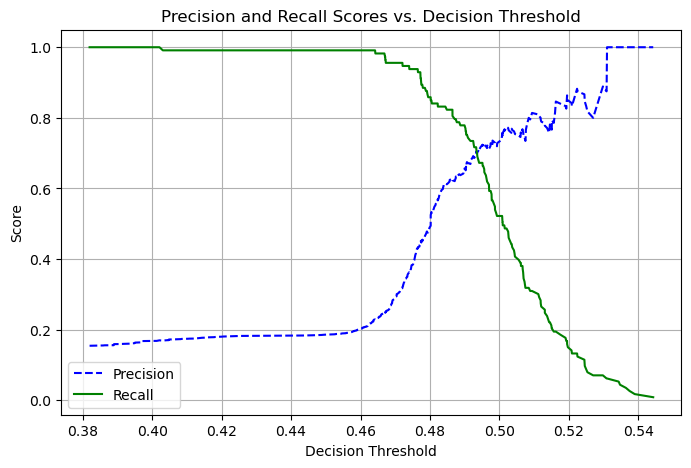

In [327]:
y_scores = adaboost_reduced_tuned.predict_proba(X_val_reduced)[:, 1]

# Calculate precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)

# Plot precision and recall as functions of the threshold value
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.title("Precision and Recall Scores vs. Decision Threshold")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

**_From the plot above, it's evident that the highest precision and recall scores together occur when the threshold is around 0.3. This suggests that our model is more confident in predicting class 0 (non-purchases) but struggles with class 1 (purchases). By lowering the threshold, the model can still accurately predict class 0 while also capturing more correct class 1 predictions. This approach can help balance the trade-off between precision and recall. Next, we'll plot the accuracy on this plot as well and identify the optimal threshold where precision and recall intersect._**


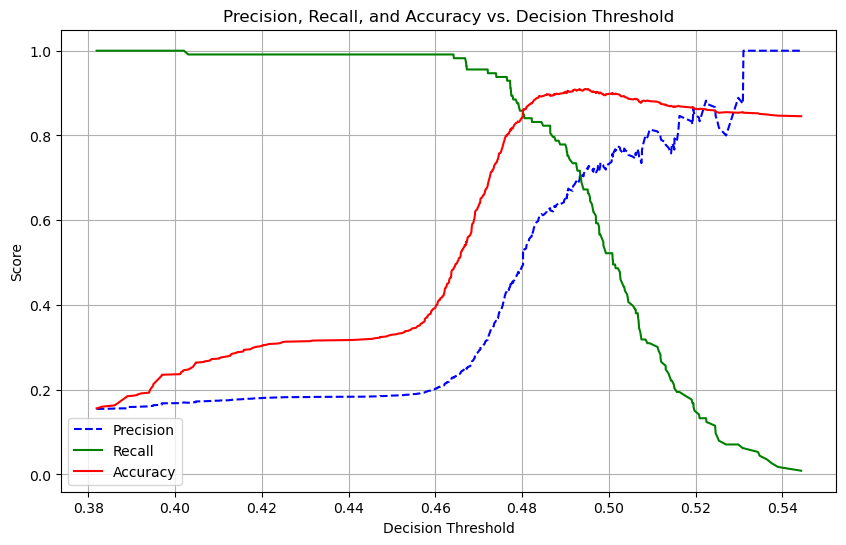

In [328]:
accuracies = []
for threshold in thresholds:
    # Apply threshold to positive class probabilities to create new predictions
    y_pred_threshold = (y_scores > threshold).astype(int)

    # Calculate confusion matrix and extract TP, TN, FP, FN
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred_threshold).ravel()

    # Calculate accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracies.append(accuracy)

# Plotting precision, recall, and accuracy
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.plot(thresholds, accuracies, "r-", label="Accuracy")
plt.title("Precision, Recall, and Accuracy vs. Decision Threshold")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [329]:
precisions = precisions[:-1]
recalls = recalls[:-1]

closest_index = np.argmin(np.abs(precisions - recalls))
intersection_threshold = thresholds[closest_index]
intersection_precision = precisions[closest_index]
intersection_recall = recalls[closest_index]

print(f"Threshold at Intersection: {intersection_threshold}")
print(f"Precision at Intersection: {intersection_precision}")
print(f"Recall at Intersection: {intersection_recall}")

Threshold at Intersection: 0.49357071681166653
Precision at Intersection: 0.6991150442477876
Recall at Intersection: 0.6991150442477876


**_We Will Now Go Ahead And Train Our Model On The Train And Validation Set. Then We Will Apply Those Thresholds To Our Predictions And Evaluate Our Performance_**


In [330]:
y_val_probabilities = adaboost_reduced_tuned.predict_proba(X_val_reduced)[:, 1]


threshold = intersection_threshold
y_pred_custom_threshold = (y_val_probabilities > threshold).astype(int)

In [331]:
print(classification_report(y_val, y_pred_custom_threshold))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       618
           1       0.70      0.69      0.70       113

    accuracy                           0.91       731
   macro avg       0.82      0.82      0.82       731
weighted avg       0.91      0.91      0.91       731



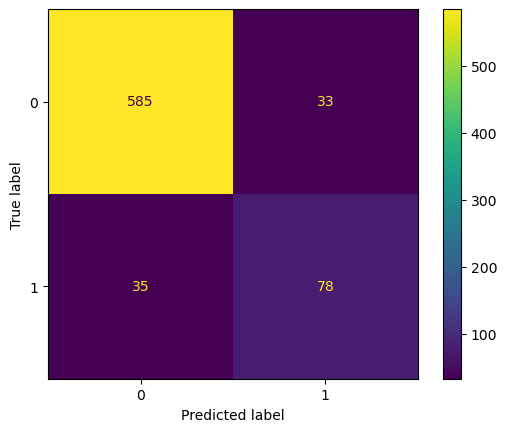

In [332]:
cm = confusion_matrix(y_val, y_pred_custom_threshold,
                      labels=adaboost_reduced_tuned.classes_)


disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=adaboost_reduced_tuned.classes_)
disp.plot()
plt.show()

In [334]:
# Reducing Our Train_Vals Set
X_train_val_reduced = pd.concat(

    [X_train_reduced, X_val_reduced], ignore_index=True)
y_train_val_concat = pd.concat([y_train, y_val], ignore_index=True)
X_test_reduced = X_test[top_43_features]

In [335]:
# Training Our Model On The Entire Training Set Which Includes Our Train And Val Sets.
adaboost_reduced_tuned.fit(X_train_val_reduced, y_train_val_concat)

AdaBoostClassifier(learning_rate=0.08455064367977082, n_estimators=376,
                   random_state=42)

In [336]:
y_pred_probabilities = adaboost_reduced_tuned.predict_proba(X_test_reduced)[

    :, 1]


threshold = intersection_threshold
y_pred_custom_threshold = (y_pred_probabilities > threshold).astype(int)

---


### Model Evaluation and Presentation


In [337]:
print(classification_report(y_test, y_pred_custom_threshold))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      8235
           1       0.63      0.72      0.67      1504

    accuracy                           0.89      9739
   macro avg       0.79      0.82      0.80      9739
weighted avg       0.90      0.89      0.89      9739



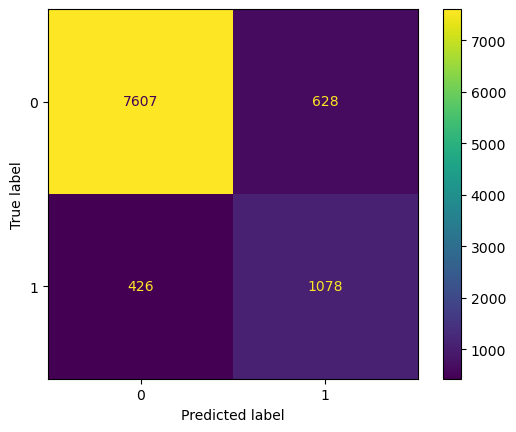

In [338]:
cm = confusion_matrix(
    y_test, y_pred_custom_threshold, labels=adaboost_reduced_tuned.classes_
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=adaboost_reduced_tuned.classes_
)
disp.plot()
plt.show()

- Our model achieves an overall accuracy of approximately 89%. While this figure might initially seem impressive, it is important to note that it largely reflects our model's ability to correctly predict the majority class (no purchase). Given that 85% of our dataset consists of non-purchase sessions, the accuracy metric alone doesn't fully capture the model's performance nuances.

- The model demonstrates a recall of 72% for predicting purchases, meaning that out of 1,504 actual purchase sessions, the model correctly identified 1,078. This suggests that the model is fairly effective at capturing sessions that lead to revenue, although there is room for improvement.

- The precision for predicting purchases is slightly lower at 63%, indicating that out of the sessions predicted as purchases, 636 were incorrectly classified, leading to false positives. This precision rate suggests some over-prediction, which could be optimized further.

- While the model may not be perfect at predicting whether a session will result in a purchase, it excels at identifying sessions that are unlikely to convert. This capability can be leveraged strategically. By focusing on these sessions with targeted offers or interventions, CocoBananas can work to increase conversions within this group.
  Moreover, the model still provides significant value by correctly identifying a substantial number of true purchase sessions. Although we would prefer an even higher precision and recall, the current performance still offers actionable insights for business strategies.

---

### Analyzing Model Predictions


In [353]:
background_sample = X_train_reduced.copy()

In [354]:
background_sample = background_sample.sample(100, random_state=42)

In [355]:
explainer = shap.KernelExplainer(
    adaboost_reduced_tuned.predict_proba, background_sample)

In [356]:
shap_values = explainer.shap_values(background_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

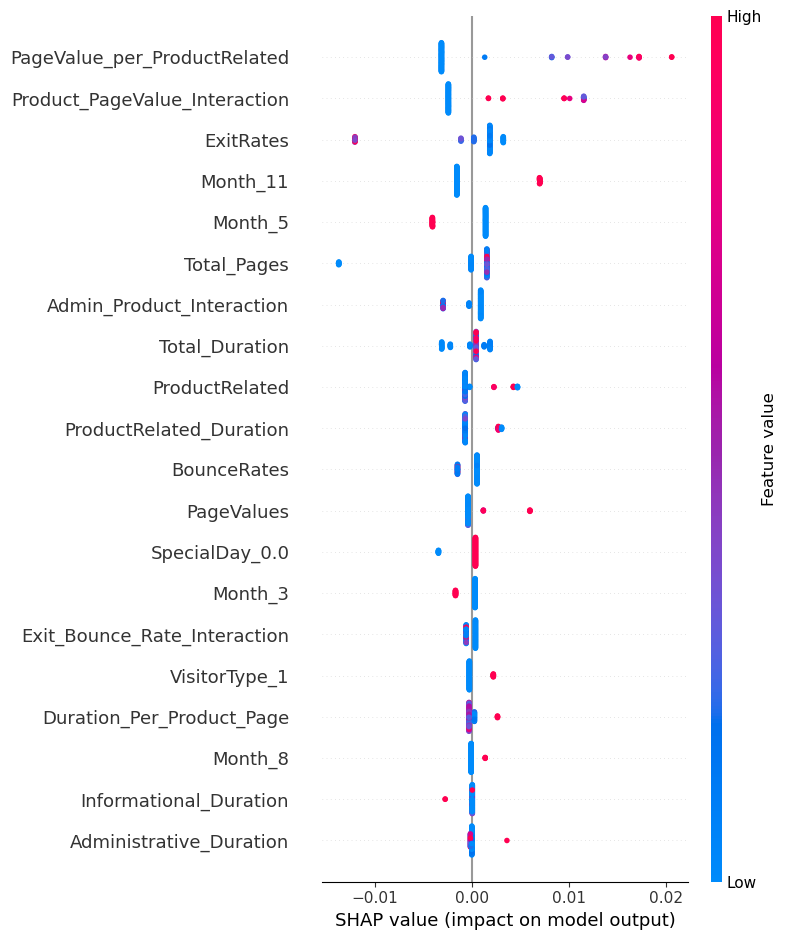

In [357]:
shap.summary_plot(shap_values[1], background_sample)

**_From the plot, we observe that features like `PageValue_per_ProductRelated`, `Product_PageValue_Interaction`, and `ExitRates` are among the most influential factors in determining whether a user will make a purchase. These features have the most significant impact on the model's predictions, with higher values of `PageValue_per_ProductRelated` and `Product_PageValue_Interaction` contributing positively towards the likelihood of a purchase, while higher `ExitRates` contribute negatively. Additionally, certain months (`Month_11` and `Month_5`) also show an impact, reflecting possible seasonal trends._**


In [358]:
shap.initjs()

shap.force_plot(
    explainer.expected_value[1], shap_values[1][0, :], background_sample.iloc[0, :])

The force plot visualizes the SHAP values for a single prediction, providing insight into how different features contribute to the model's decision.

- **Base Value**: Represents the model's expected output if no feature values were known.
- **Shapley Values**: Indicate how much each feature is pushing the prediction towards a higher or lower value.
- **Final Output**: The prediction probability for this particular instance.

In this case, features such as `PageValue_per_ProductRelated` and `Product_PageValue_Interaction` are pulling the prediction towards a higher likelihood of purchase (blue arrows). On the other hand, features like `Admin_Product_Interaction` and `Month_5` push the prediction away from a purchase (red arrows). This plot effectively illustrates the balance of positive and negative influences on the model's output for this specific prediction.


**_Making Predictions_**


In [344]:
predicted_revenue = adaboost_reduced_tuned.predict(background_sample)

In [345]:
background_sample["Predicted_Revenue"] = predicted_revenue

In [346]:
background_sample["Predicted_Revenue"].value_counts()

Predicted_Revenue
0    90
1    10
Name: count, dtype: int64

In [347]:
background_sample

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Total_Pages,...,Region_1.0,Region_3.0,Region_4.0,Region_9.0,TrafficType_1,TrafficType_2,TrafficType_4,TrafficType_8,TrafficType_10,Predicted_Revenue
11518,0.000000,0.000000,0.153846,0.013339,0.205011,0.162680,0.041501,0.223981,0.000000,0.200441,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1025,0.136364,0.012419,0.000000,0.000000,0.152620,0.083509,0.877054,0.055736,0.000000,0.151982,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1190,0.181818,0.049674,0.000000,0.000000,0.015945,0.047158,0.075532,0.146429,0.000000,0.022026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3675,0.000000,0.000000,0.000000,0.000000,0.029613,0.005722,0.040348,0.403846,0.000000,0.026432,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
12145,0.136364,0.054049,0.000000,0.000000,0.143508,0.093463,0.006358,0.064935,0.031528,0.143172,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.454545,0.061905,0.076923,0.001539,0.138952,0.076498,0.000000,0.047761,0.000000,0.156388,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
11662,0.000000,0.000000,0.000000,0.000000,0.020501,0.011328,0.000000,0.069444,0.000000,0.017621,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
5632,0.090909,0.159409,0.000000,0.000000,0.104784,0.067784,0.027367,0.119565,0.000000,0.103524,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6504,0.045455,0.050427,0.000000,0.000000,0.047836,0.047701,0.000000,0.047619,0.000000,0.046256,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


After refining our model through tuning and feature engineering, our AdaBoost model has provided valuable insights into predicting customer purchases. Upon testing, the model predicted that 90 sessions would not lead to a purchase, while 10 sessions likely would. These predictions align with our SHAP analysis, highlighting the significant impact of features like PageValues, ExitRates, and interaction terms such as Product_PageValue_Interaction on the model's decision-making process.

A key observation is the model's heavy reliance on a few dominant features. For instance, PageValues emerged as a strong indicator of purchase likelihood, suggesting that users engaging with high-value pages are more inclined to make a purchase. However, this dependency also limits the model's flexibility in predicting outcomes for sessions where these features are less prominent.

The dataset's inherent imbalance—where non-purchase sessions far outnumber purchase sessions—affects the model's predictive performance. Despite the tuning efforts, the model still favors predicting non-purchases, which is understandable given the data distribution, but it underscores the challenge of accurately identifying the fewer sessions that lead to a purchase.

Looking ahead, there are several avenues CocoBananas could explore:

Enhanced Data Collection: Improving data collection methods could provide more granular insights, particularly around user behaviors leading to purchases. This might involve tracking interactions on key pages or soliciting customer feedback to understand non-purchase behavior.

Further Feature Engineering: Introducing additional interaction terms or analyzing time spent on crucial pages could enhance the model's predictive accuracy. Exploring these areas could uncover new patterns that better predict purchase behavior.

Business Strategy Adjustments: The model indicates that certain periods, such as May, see lower purchase activity. CocoBananas could leverage this information by launching targeted promotions or campaigns during these slower periods to boost sales.

Utilizing SHAP for Insights: The use of SHAP has provided transparency into the model’s predictions, enabling CocoBananas to fine-tune their strategies based on these insights. This understanding of feature importance can guide more informed business decisions.

In conclusion, while our model performs reasonably well, there is always potential for improvement. By focusing on better data collection, refining feature engineering, and applying the insights gained from this analysis, CocoBananas can optimize their strategies to better serve their customers and increase purchase conversions.
